# Importing the basic neccessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Importing Dataset
data_raw = pd.read_csv("players_20.csv")
pd.set_option("display.max_columns", None)
data_raw

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

# 2) Basic Checks and Data Cleaning

In [5]:
# Checking that how many rows and columns are present in the data
data_raw.shape

(18278, 104)

#### There are 18278 rows and 104 columns are present in the dataset.
####

### Identifying which columns contain what information


#### 1) "sofifa_id": likely refers to a unique identifier assigned to each player on the SoFIFA website, which can be used to retrieve specific data about them.
#####
#### 2) "player_url": It refers to the URL of each player on the SoFIFA website, which contains the player's stats.
##### 
#### 3) "short_name": It refers to the short names of each player.
#####
#### 4) "long_name": It refers to the full name of each player.
#####
#### 5) "age": It refers to age of each player.
#####
#### 6) "dob": It refers to date of birth of each player.
#####
#### 7) "height_cm": It refers to height of players in cm.
#####
#### 8) "weight_kg": It refers to weight of players in kg.
#####
#### 9) "nationality": It refers to the information about which country each player belongs to.
#####
#### 10) "club": It refers to the information about which club each player belongs to.
#####
#### 11) "overall": It refers to the general performance quality and value of the player, representing the key positional skills and international reputation, rated between 1-99.
#####
#### 12) "potential": It refers to the maximum overall rating expected to be reached by a player at the peak of their career, rated between 1-99.
#####
#### 13) "value_eur	": It refers to the player's market value in euros.
#####
#### 14) "wage_eur": It refers to the player's weekly wage in euros, representing the amount the player earns from their club on a weekly basis.
#####
#### 15) "player_positions": It refers to the various positions a player can play on the field, such as forward, midfielder, defender, or goalkeeper.
#####
#### 16) "preferred_foot": It refers to the player's dominant foot, indicating whether they prefer to use their left or right foot.
#####
#### 17) "international_reputation": It refers to the player's international reputation, rated between 1-5, indicating how well-known and respected the player is on the global stage.
#####
#### 18) "weak_foot": It refers to how well a player uses their weak foot (e.g., left for righties), rated between 1 to 5.
#####
#### 19) "skill_moves": It refers to the player's ability to perform skill moves, rated between 1 to 5.
#####
#### 20) "work_rate": It refers to the degree of effort the player puts in terms of attack and defense, rated as low, medium, and high.
#####
#### 21) "body_type: "It refers to the player's physical build, such as lean, average, stocky, or normal.
#####
#### 22) "real_face": It refers to whether the player's face in the game is a real-life likeness.
#####
#### 23) "release_clause_eur": It refers to the amount a club must pay to release the player from their current contract.
#####
#### 24) "player_tags": It refers to specific attributes or characteristics associated with a player, such as 'Dribbler,' 'Speedster,' or 'Playmaker.' These tags highlight the player's unique skills and playing style.
#####
#### 25) "team_position": It refers to the player's position within their team, such as forward, midfielder, defender, or goalkeeper.
#####
#### 26) "team_jersey_number": It refers to the number assigned to a player on their team's jersey.
#####
#### 27) "loaned_from": It refers to the club from which the player is currently on loan.
#####
#### 28) "joined": It refers to the date when the player joined their current club.
#####
#### 29) "contract_valid_until": It refers to the date until which the player's contract with their current club is valid.
#####
#### 30) "nation_position": It refers to the player's position within their national team, such as forward, midfielder, defender, or goalkeeper.
#####
#### 31) "nation_jersey_number": It refers to the number assigned to a player on their national team's jersey.
#####
#### 32) "pace": It refers to the player's speed, including both acceleration and sprint speed.
#####
#### 33) "shooting": It refers to the player's ability to score goals, including their accuracy and power when taking shots.
#####
#### 34) "passing": It refers to the player's ability to accurately pass the ball to teammates, including short and long passes.
#####
#### 35) "dribbling": It refers to the player's ability to control the ball while moving, including their agility and skill in maneuvering past opponents.
#####
#### 36) "defending": It refers to the player's ability to prevent the opposing team from scoring, including skills like tackling, marking, and intercepting the ball.
#####
#### 37) "physic": It refers to the player's physical attributes, such as strength, stamina, and overall physical presence on the field, represented by a numeric value.
#####
#### 38) "gk_diving": It refers to the goalkeeper's ability to dive and make saves, represented by a numeric value.
#####
#### 39) "gk_handling": It refers to the goalkeeper's ability to catch and hold onto the ball.
#####
#### 40) "gk_kicking": It refers to the goalkeeper's ability to kick the ball accurately and with power.
#####
#### 41) "gk_reflexes": "It refers to the goalkeeper's ability to react quickly and make saves.
#####
#### 42) "gk_speed": It refers to the goalkeeper's speed, including both their acceleration and sprint speed.
#####
#### 43) "gk_positioning": It refers to the goalkeeper's ability to position themselves correctly to make saves.
#####
#### 44) "player_traits": It refers to the player's special skills or traits, such as 'Beat Offside Trap,' 'Argues with Officials,' or 'Early Crosser.
#####
#### 45) "attacking_crossing": It refers to the player's ability to deliver accurate crosses from wide areas into the penalty box.
#####
#### 46) "attacking_finishing": It refers to the player's ability to score goals when presented with a chance, focusing on accuracy and composure in front of the goal.
#####
#### 47) "attacking_heading_accuracy": It refers to the player's ability to accurately head the ball towards the goal during attacking plays.
#####
#### 48) "attacking_short_passing": It refers to the player's ability to make accurate short passes to teammates during attacking plays.
#####
#### 49) "attacking_volleys": It refers to the player's ability to strike the ball with power and accuracy while it's in the air, typically during attacking plays.
#####
#### 50) "skill_dribbling": It refers to the player's ability to control the ball while moving, including their agility and skill in maneuvering past opponents.
#####
#### 51) "skill_curve": It refers to the player's ability to bend the ball while shooting, typically used for free-kicks and long-range shots.
#####
#### 52) "skill_fk_accuracy": It refers to the player's ability to accurately take free-kicks, focusing on precision and technique.
#####
#### 53) "skill_long_passing": It refers to the player's ability to make accurate long passes to teammates over greater distances.
#####
#### 54) "skill_ball_control": It refers to the player's ability to control the ball with precision and ease, including their first touch and overall ball-handling skills.
#####
#### 55) "movement_acceleration": It refers to the player's ability to quickly reach their top speed from a standing start.
#####
#### 56) "movement_sprint_speed": It refers to the player's top speed when sprinting.
#####
#### 57) "movement_agility": It refers to the player's ability to change direction quickly and maintain control of the ball while moving.
#####
#### 58) "movement_reactions": It refers to the player's ability to quickly respond to events on the field, such as intercepting passes or reacting to loose balls.
#####
#### 59) "movement_balance": It refers to the player's ability to maintain stability and control while moving, especially when changing direction or under physical pressure.
#### 60) "power_shot_power": It refers to the player's ability to strike the ball with power when taking shots.
#####
#### 61) "power_jumping": It refers to the player's ability to jump high, which is crucial for winning aerial duels and heading the ball.
#####
#### 62) "power_stamina": It refers to the player's ability to maintain high energy levels and perform effectively throughout the entire match.
#####
#### 63) "power_strength": It refers to the player's physical strength, which is crucial for holding off opponents and winning physical battles on the field.
#####
#### 64) "power_long_shots": It refers to the player's ability to take powerful and accurate shots from long distances.
#####
#### 65) "mentality_aggression": It refers to the player's level of aggression and intensity during matches, influencing their willingness to engage in physical battles and challenges.
#####
#### 66) "mentality_interceptions": It refers to the player's ability to anticipate and intercept passes from the opposing team, helping to regain possession for their team.
#####
#### 67) "mentality_positioning": It refers to the player's ability to position themselves effectively on the field, both in attack and defense, to maximize their impact on the game.
#####
#### 68) "mentality_vision": It refers to the player's ability to see and anticipate opportunities on the field, including their awareness of teammates' positions and potential passing options.
#####
#### 69) "mentality_penalties": It refers to the player's ability to take accurate and composed penalty kicks under pressure.
#####
#### 70) "mentality_composure": It refers to the player's ability to remain calm and make effective decisions under pressure, especially in high-stakes situations.
#####
#### 71) "defending_marking": It refers to the player's ability to track and stay close to an opponent, preventing them from receiving the ball or making effective plays.
#####
#### 72) "defending_standing_tackle": It refers to the player's ability to effectively use standing tackles to dispossess opponents and regain control of the ball.
#####
#### 73) "defending_sliding_tackle": It refers to the player's ability to effectively use sliding tackles to dispossess opponents and regain control of the ball.
#####
#### 74) "goalkeeping_diving": It refers to the goalkeeper's ability to dive and make saves, especially when dealing with shots aimed at the corners of the goal.
#####
#### 75) "goalkeeping_handling": It refers to the goalkeeper's ability to catch and hold onto the ball, minimizing the risk of rebounds and loose balls.
#### 76) "goalkeeping_kicking": It refers to the goalkeeper's ability to accurately and powerfully kick the ball, whether it's for clearances, goal kicks, or distributing the ball to teammates.
#####
#### 77) "goalkeeping_positioning": It refers to the goalkeeper's ability to position themselves effectively in the goal to make saves and prevent scoring opportunities.
#####
#### 78) "goalkeeping_reflexes": It refers to the goalkeeper's ability to quickly react and make saves, especially in close-range situations.
#####
#### 79) "ls": The player's general ability when playing in the Left Striker (LS) position, rated between 1-99.
#####
#### 80) "st": It refers to the player's general ability when playing in the Striker (ST) position, rated between 1-99.
#####
#### 81) "rs": It refers to the player's general ability when playing in the Right Striker (RS) position, rated between 1-99.
#####
#### 82) "lw": It refers to the player's general ability when playing in the Left Winger (LW) position, rated between 1-99.
#####
#### 83) "lf": It refers to the player's general ability when playing in the Left Forward (LF) position, rated between 1-99.
#####
#### 84) "cf": It refers to the player's general ability when playing in the Center Forward (CF) position, rated between 1-99.
#####
#### 85) "rf": It refers to the player's general ability when playing in the Right Forward (RF) position, rated between 1-99.
#####
#### 86) "rw": "It refers to the player's general ability when playing in the Right Winger (RW) position, rated between 1-99.
#####
#### 87) "lam": It refers to the player's general ability when playing in the Left Attacking Midfielder (LAM) position, rated between 1-99.
#####
#### 88) "cam": It refers to the player's general ability when playing in the Center Attacking Midfielder (CAM) position, rated between 1-99.
#####
#### 89) "ram": It refers to the player's general ability when playing in the Right Attacking Midfielder (RAM) position, rated between 1-99.
##### 
#### 90) "lm": It refers to the player's general ability when playing in the Left Midfielder (LM) position, rated between 1-99.
#####
#### 91) "lcm": It refers to the player's general ability when playing in the Left Center Midfielder (LCM) position, rated between 1-99.
#####
#### 92) "cm": It refers to the player's general ability when playing in the Center Midfielder (CM) position, rated between 1-99.
#####
#### 93) "rcm": It refers to the player's general ability when playing in the Right Center Midfielder (RCM) position, rated between 1-99.
#####
#### 94) "rm": "It refers to the player's general ability when playing in the Right Midfielder (RM) position, rated between 1-99.
#####
#### 95) "lwb": "It refers to the player's general ability when playing in the Left Wing Back (LWB) position, rated between 1-99.
#####
#### 96) "ldm": It refers to the player's general ability when playing in the Left Defensive Midfielder (LDM) position, rated between 1-99.
#####
#### 97) "cdm": It refers to the player's general ability when playing in the Center Defensive Midfielder (CDM) position, rated between 1-99.
#####
#### 98) "rdm": "It refers to the player's general ability when playing in the Right Defensive Midfielder (RDM) position, rated between 1-99.
#####
#### 99) "rwb": It refers to the player's general ability when playing in the Right Wing Back (RWB) position, rated between 1-99.
#####
#### 100) "lb": It refers to the player's general ability when playing in the Left Back (LB) position, rated between 1-99.
#####
#### 101) "lcb": It refers to the player's general ability when playing in the Left Center Back (LCB) position, rated between 1-99.
#####
#### 102) "cb": "It refers to the player's general ability when playing in the Center Back (CB) position, rated between 1-99.
#####
#### 103) "rcb": It refers to the player's general ability when playing in the Right Center Back (RCB) position, rated between 1-99.
#####
#### 104) "rb": It refers to the player's general ability when playing in the Right Back (RB) position, rated between 1-99.

In [9]:
data_raw.head(2)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3


In [10]:
data_raw.tail(2)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,48,54,40000,1000,CM,Right,1,2,2,Low/Low,Lean,No,70000.0,NaN,SUB,33.0,NaN,2019-02-01,2022.0,NaN,NaN,59.0,35.0,47.0,47.0,45.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13,43+2,43+2,43+2,45+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2
18277,233449,https://sofifa.com/player/233449/ximing-pan/20...,Pan Ximing,潘喜明,26,1993-01-11,182,78,China PR,Hebei China Fortune FC,48,51,40000,2000,CM,Right,1,3,2,Medium/Medium,Normal,No,NaN,NaN,SUB,37.0,Tianjin TEDA FC,NaN,2019.0,NaN,NaN,60.0,32.0,51.0,45.0,47.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,30,48,58,25,40,34,35,52,46,54,64,52,49,71,41,64,40,61,30,54,47,29,52,38,42,52,42,48,8,12,14,9,10,42+2,42+2,42+2,44+2,43+2,43+2,43+2,44+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2


### Challenges faced: 
#####
#### 1)   As per the business case provided, the dataset includes player data for Career Mode from FIFA 15 to FIFA 20. However, it is observed that there is no version year mentioned in the dataset, and there are single entries for each player for each skill.
####

#### Some columns in the dataset have overlapping information. For example, the 'pace' column includes both acceleration and sprint speed, but there are also separate columns for 'movement_acceleration' and 'movement_speed'. This redundancy can make the data confusing and harder to analyze.
####

### Removing columns that are not useful or contain the same information.

In [14]:
columns_to_remove = ["sofifa_id", "player_url", "long_name", "real_face",
                     "player_tags", "team_jersey_number", "loaned_from",
                     "nation_position", "team_position", "nation_jersey_number",
                     "pace", "shooting", "passing", "dribbling", "defending", "gk_diving",
                     "gk_handling", "gk_kicking", "gk_reflexes", "gk_speed", "gk_positioning",
                     "player_traits"]
data = data_raw.drop(columns = columns_to_remove)
data

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,release_clause_eur,joined,contract_valid_until,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,195800000.0,2004-07-01,2021.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,96500000.0,2018-07-10,2022.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,195200000.0,2017-08-03,2022.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,164700000.0,2014-07-16,2023.0,NaN,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,184500000.0,2019-07-01,2024.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,Shao Shuai,22,1997-03-10,186,79,China PR,Beijing Renhe FC,48,56,40000,2000,CB,Right,1,3,2,Medium/High,Normal,70000.0,2018-07-13,2019.0,51.0,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14,32+2,32+2,32+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,33+2,33+2,33+2,33+2,33+2,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,Xiao Mingjie,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,48,56,40000,2000,CB,Right,1,2,2,Medium/Medium,Normal,72000.0,2019-02-01,2022.0,48.0,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9,33+2,33+2,33+2,33+2,32+2,32+2,32+2,33+2,33+2,33+2,33+2,35+2,36+2,36+2,36+2,35+2,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,Zhang Wei,19,

In [15]:
data.isnull().sum()

short_name       0
age              0
dob              0
height_cm        0
weight_kg        0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 82, dtype: int64

#### There are too many null values in the dataset, so removing them will cause a significant loss of data.

In [17]:
# Checking for NaN values
data.isna().sum()

short_name       0
age              0
dob              0
height_cm        0
weight_kg        0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 82, dtype: int64

#### There are too many NaN values present in the dataset.
####

#### There are 47 columns that contain numeric data and 35 columns that contain non-numeric data. However, some of the non-numeric columns contain positional skills rated between 0-99, so we need to convert these columns to numeric.
####

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 82 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  18278 non-null  object 
 1   age                         18278 non-null  int64  
 2   dob                         18278 non-null  object 
 3   height_cm                   18278 non-null  int64  
 4   weight_kg                   18278 non-null  int64  
 5   nationality                 18278 non-null  object 
 6   club                        18278 non-null  object 
 7   overall                     18278 non-null  int64  
 8   potential                   18278 non-null  int64  
 9   value_eur                   18278 non-null  int64  
 10  wage_eur                    18278 non-null  int64  
 11  player_positions            18278 non-null  object 
 12  preferred_foot              18278 non-null  object 
 13  international_reputation    182

In [21]:
# List of columns to convert
columns_to_convert = [
    'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 
    'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 
    'lb', 'lcb', 'cb', 'rcb', 'rb'
]

# Convert the specified columns
for column in columns_to_convert:
    data[column] = data[column].str.split('+').str[0].fillna(0).astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 82 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  18278 non-null  object 
 1   age                         18278 non-null  int64  
 2   dob                         18278 non-null  object 
 3   height_cm                   18278 non-null  int64  
 4   weight_kg                   18278 non-null  int64  
 5   nationality                 18278 non-null  object 
 6   club                        18278 non-null  object 
 7   overall                     18278 non-null  int64  
 8   potential                   18278 non-null  int64  
 9   value_eur                   18278 non-null  int64  
 10  wage_eur                    18278 non-null  int64  
 11  player_positions            18278 non-null  object 
 12  preferred_foot              18278 non-null  object 
 13  international_reputation    182

#### We converted the necessary non-numeric columns into numeric columns and also filled the NaN values in these columns with 0. Filling the NaN values with 0 is valid because these columns contain positional skills. For example, if a player is a left striker, the values for that position are maximum, and the player can also play in other positions but not as well as their own position. Therefore, the values for this player in some positions are NaN, meaning that the player cannot play in those positions (e.g., goalkeeper position). For a goalkeeper, the values in other positions are NaN, so replacing those values with zero is valid.
####
#### Another option is to remove those NaN values, but the count is very high, so removing them may cause excessive data loss.
#### 

In [23]:
data.head(2)

,short_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,release_clause_eur,joined,contract_valid_until,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,195800000.0,2004-07-01,2021.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63
1,Cristiano Ronaldo,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,96500000.0,2018-07-10,2022.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61


In [24]:
# Cheaking for Duplicates
data.duplicated().sum()

0

#### There are no duplicates present in the data.
####

# 3) EDA

## i) Univariate Analysis:

In [28]:
data.describe()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,contract_valid_until,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,16242.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,2021.114591,64.876678,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924,51.397855,51.397855,51.397855,52.504322,52.229237,52.229237,52.229237,52.504322,52.472645,52.472645,52.472645,53.108272,51.755061,51.755061,51.755061,53.108272,51.002900,50.413886,50.413886,50.413886,51.002900,50.359613,49.296203,49.296203,49.296203,50.359613
std,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,1.289888,9.760162,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125,20.145877,20.145877,20.145877,20.781284,20.684817,20.684817,20.684817,20.781284,20.721317,20.721317,20.721317,20.716599,20.114402,20.114402,20.114402,20.716599,19.964329,20.255338,20.255338,20.255338,19.964329,19.991826,20.685366,20.685366,20.685366,19.991826
min,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,2019.000000,27.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

### Interpretation about Skills:
#### Most of the entries are about player skills. They show which player performs better at which position or type, with the highest values indicating the best performance and the lowest values indicating the worst performance—max and min values, respectively.
#####
### Interpretation about weight, height, age:
#### 1) The player with the minimum age is 16 years, while the player with the maximum age is 42 years.
#####
#### 2) The player with the minimum height is 156 cm, while the tallest player is 205 cm.
#####
#### 3) The player with the minimum weight is 50 kg, while the heaviest player is 110 kg.
#####
### Interpretation based on overall, potential and some other features:
#### 1) The player with the minimum overall rating is 48, while the highest-rated player is 94.
#####
#### 2) The player with the minimum potential is 49, while the player with the highest potential is 95.
#####
#### 3) The player with the minimum market value in euros is 0 (i.e., less than a euro), while the highest market value is 105,500,000 euros.
#####
#### 4) The player with the minimum release clause, which represents the amount of money a team must pay to release a player from their contract, in euros is 13,000, while the maximum release clause is 195,800,000 euros.
#####
#### 5) The player with the minimum physical attribute, which represents a player's physical abilities such as strength, endurance, and agility, is 27, while the maximum physical attribute is 90.
#####
### Interpretation based on international reputation, weak foot, and skill moves:
#### The player attributes for international reputation, weak foot, and skill moves are ranged from 1 to 5. Consequently, the maximum value for each attribute is 5, while the minimum value is 1.
#####

Text(0, 0.5, 'Frequency')

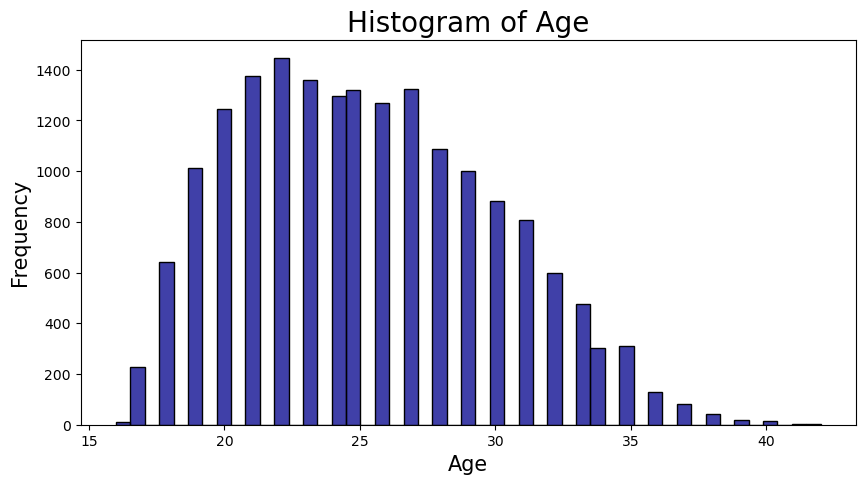

In [30]:
plt.figure(figsize = (10,5))
sns.histplot(x = 'age', data = data, color = 'darkblue')
plt.title('Histogram of Age', fontsize = 20)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

In [ ]:
# draw a subplot as pie chart for  different features
#1) preferred_foot	
#2) international_reputation
#3) weak_foot
#5) skill_moves

In [ ]:
# Count the number of players in each club

In [ ]:
# Check the distribution of continuous variables